In [1]:
import numpy as np
from scipy.interpolate import interp1d
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

# WFDB檔資料集載入及資料前處理

In [3]:
!pip install wfdb

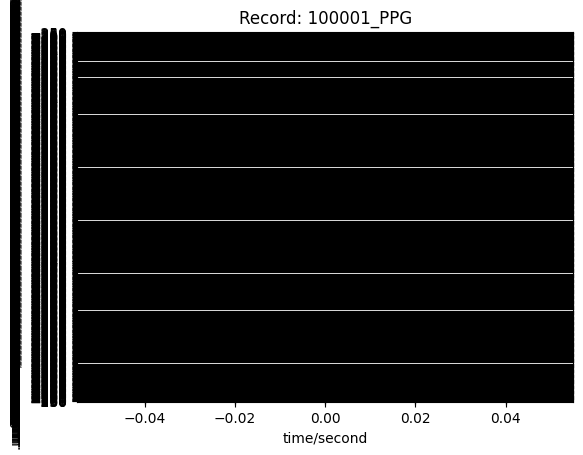

{'record_name': '100001_PPG',
 'n_sig': 300,
 'fs': 30,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1,
 'base_time': None,
 'base_date': None,
 'comments': ['PPG'],
 'sig_name': ['.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 0 0 0',
  '.u. 0 0 

In [32]:
import wfdb

# 讀取檔案
record = wfdb.rdrecord('/content/drive/MyDrive/Colab Notebooks/PPG/異常 WFDB MIMIC/100001_PPG')
wfdb.plot_wfdb(record=record)
display(record.__dict__)


TypeError: 'Record' object is not subscriptable

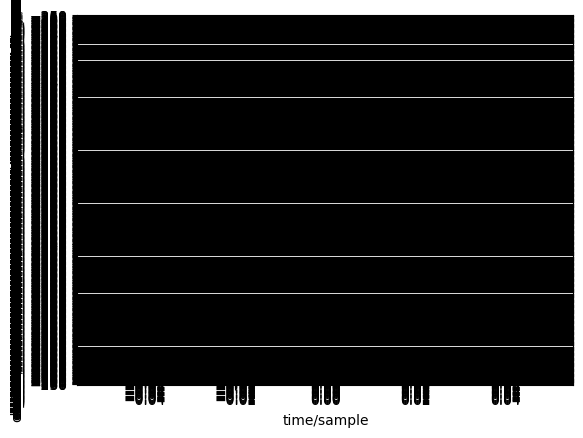

array([[-254.17483741, -254.41797627, -254.14881438, -254.41185262,
        -254.19337221, -254.48594879, -254.50393597, -254.48970415,
        -254.16951409, -254.08594738, -254.28924422, -254.25116294,
        -254.19218906, -254.20934586, -254.22966093, -254.25412221,
        -253.96050347, -254.27424712, -254.28490277, -254.291415  ,
        -254.32654731, -254.3352332 , -254.08121883, -254.08180989,
        -254.11530772, -254.4059268 , -254.1588681 , -254.44326413,
        -254.46697606, -254.45650275, -254.40849462, -254.38558355,
        -254.33720734, -254.00479839, -254.37867154, -254.3593199 ,
        -254.27898285, -254.29753285, -254.31312483, -254.04123024,
        -254.38084384, -254.358925  , -254.36563848, -254.36642832,
        -254.39012593, -254.4059268 , -254.42232226, -254.1791751 ,
        -254.19337221, -254.47745024, -254.46855701, -254.42666841,
        -254.09737543, -254.04871483, -254.2560951 , -253.91150176,
        -254.17562607, -254.2042183 , -254.25214

{'fs': 30,
 'sig_len': 1,
 'n_sig': 300,
 'base_date': None,
 'base_time': None,
 'units': ['a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',


In [35]:
# 只擷取PPG訊號
signals, fields = wfdb.rdsamp('/content/drive/MyDrive/Colab Notebooks/PPG/異常 WFDB MIMIC/100001_PPG', channels=[0])
wfdb.plot_items(signal=signals, fs=fields['fs'])
display(signals, fields)


In [38]:
signals

array([[-254.17483741, -254.41797627, -254.14881438, -254.41185262,
        -254.19337221, -254.48594879, -254.50393597, -254.48970415,
        -254.16951409, -254.08594738, -254.28924422, -254.25116294,
        -254.19218906, -254.20934586, -254.22966093, -254.25412221,
        -253.96050347, -254.27424712, -254.28490277, -254.291415  ,
        -254.32654731, -254.3352332 , -254.08121883, -254.08180989,
        -254.11530772, -254.4059268 , -254.1588681 , -254.44326413,
        -254.46697606, -254.45650275, -254.40849462, -254.38558355,
        -254.33720734, -254.00479839, -254.37867154, -254.3593199 ,
        -254.27898285, -254.29753285, -254.31312483, -254.04123024,
        -254.38084384, -254.358925  , -254.36563848, -254.36642832,
        -254.39012593, -254.4059268 , -254.42232226, -254.1791751 ,
        -254.19337221, -254.47745024, -254.46855701, -254.42666841,
        -254.09737543, -254.04871483, -254.2560951 , -253.91150176,
        -254.17562607, -254.2042183 , -254.25214

In [39]:
# 異常值處理
# 移除包含 nan 的行
signals1 = signals[~np.isnan(signals).any(axis=1)]

# 如果您想要的结果是一维数组
signals = signals1.flatten()

print(signals1)
print(signals)

[[-254.17483741 -254.41797627 -254.14881438 -254.41185262 -254.19337221
  -254.48594879 -254.50393597 -254.48970415 -254.16951409 -254.08594738
  -254.28924422 -254.25116294 -254.19218906 -254.20934586 -254.22966093
  -254.25412221 -253.96050347 -254.27424712 -254.28490277 -254.291415
  -254.32654731 -254.3352332  -254.08121883 -254.08180989 -254.11530772
  -254.4059268  -254.1588681  -254.44326413 -254.46697606 -254.45650275
  -254.40849462 -254.38558355 -254.33720734 -254.00479839 -254.37867154
  -254.3593199  -254.27898285 -254.29753285 -254.31312483 -254.04123024
  -254.38084384 -254.358925   -254.36563848 -254.36642832 -254.39012593
  -254.4059268  -254.42232226 -254.1791751  -254.19337221 -254.47745024
  -254.46855701 -254.42666841 -254.09737543 -254.04871483 -254.2560951
  -253.91150176 -254.17562607 -254.2042183  -254.25214935 -254.24366641
  -254.26004097 -254.38538606 -254.31726986 -254.33306167 -254.34115573
  -254.139747   -254.14605467 -254.40335902 -254.40256895 -254.4102

# AF Data load


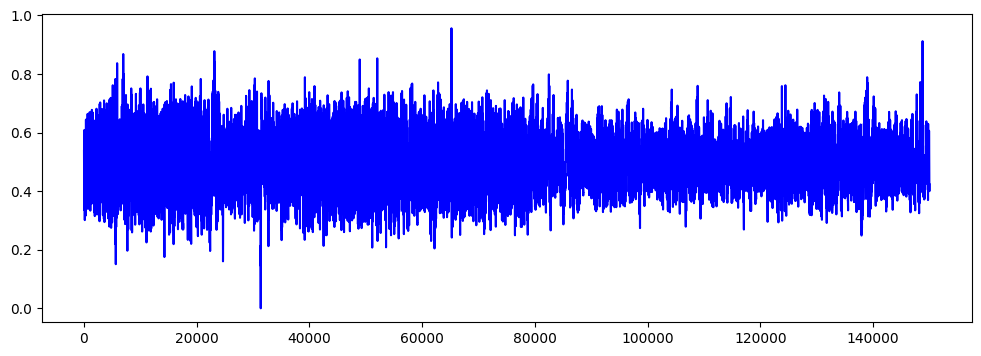

In [ ]:
signals = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG/mimic_perform_af_csv/mimic_perform_af_001_data.csv')
signals = signals['PPG']

# 繪圖
plt.figure(figsize=(12, 4))
plt.plot(signals, color='blue')
plt.show()

In [ ]:
ppg_signal = signals
ppg_signal

0         0.537634
1         0.534702
2         0.531769
3         0.528837
4         0.524927
            ...   
149996    0.401760
149997    0.404692
149998    0.409580
149999    0.416422
150000    0.423265
Name: PPG, Length: 150001, dtype: float64

# 濾波

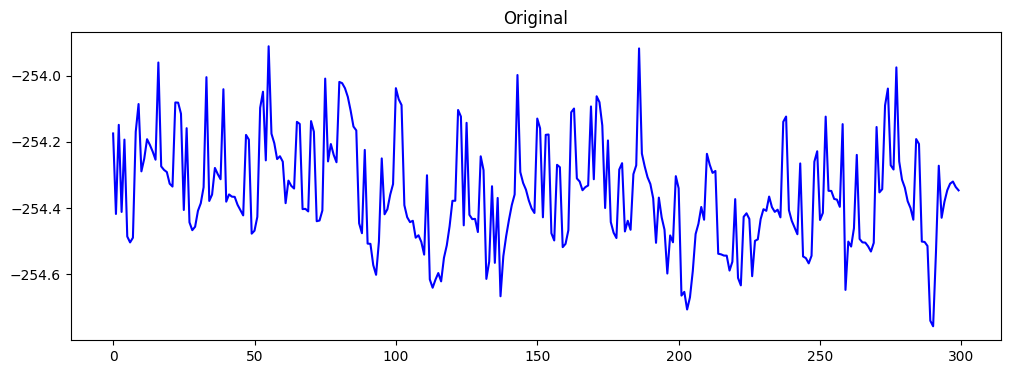

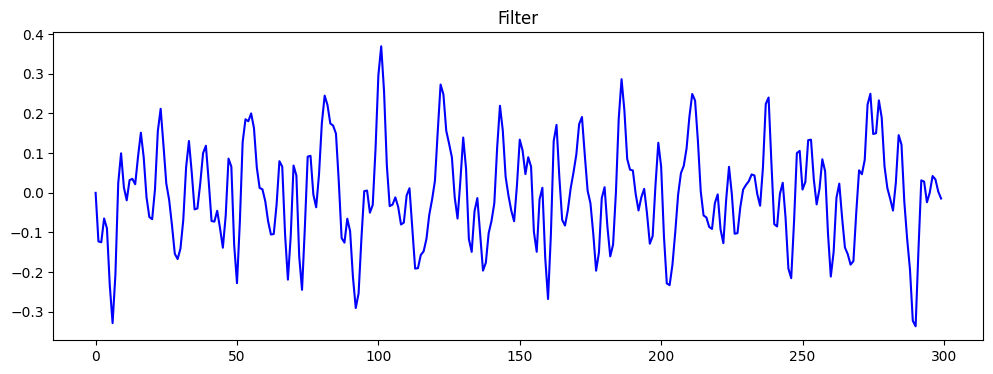

In [40]:
# 濾波
# 使用巴特沃斯濾波器(Butterworth Filter)

fs = 125 # 樣本率(Hz)
lowcut = 0.67 # 通帶低頻(Hz)
highcut = 8.0 # 通帶高頻(Hz)
order = 5 # 濾波器的階數


# 設計巴特沃斯帶通濾波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

# 開始濾波
ppg_signal = butter_bandpass_filter(signals, lowcut, highcut, fs, order=3)


# 繪圖
plt.figure(figsize=(12, 4))
plt.plot(signals, color='blue')
plt.title('Original')
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(ppg_signal, color='blue')
plt.title('Filter')
plt.show()

# 資料集分割和插值

In [41]:
# 資料集分割
fs = 125  # 採樣率(Hz)
segment_length_seconds = 5  # 預切割秒數
segment_length_points = fs * segment_length_seconds  # 每個段落應包含的數據點數量

ppg_data_noraml = ppg_signal.tolist()

# 分割PPG訊號數據
segments_ppg = [ppg_data_noraml [i: i + segment_length_points] for i in range(0, len(ppg_data_noraml), segment_length_points)]

print(f'採樣率為{fs}，預分割秒數為{segment_length_seconds}，一段為{segment_length_points}數據點')
print(f'切割{len(segments_ppg)}段')
print(f'最後一段為{len(segments_ppg[-1])}個數據點')

if segments_ppg[-1] != segment_length_points:
    segments_ppg.pop()
    print(f'最後一段不足{segment_length_points}，移除最後一段，剩餘{len(segments_ppg)}段')
    print(f'最後一段數據點為{len(segments_ppg[-1])}')

採樣率為30，預分割秒數為5，一段為150數據點
切割2段
最後一段為150個數據點
最後一段不足150，移除最後一段，剩餘1段
最後一段數據點為150


In [42]:
# 插值
# 因訓練集所採用的採樣率為1000Hz，與目前的資料集不同，需進行插值才能進行predict
def interpolate_signal(original_signal, target_num_points):
    # 原始信号的实际时间长度
    signal_length = len(original_signal)

    # 生成原始信号的时间点
    x_old = np.linspace(0, signal_length, num=signal_length, endpoint=False)

    # 生成目标信号的时间点，确保不超出原始时间范围
    x_new = np.linspace(0, signal_length, num=target_num_points, endpoint=False)

    # 选择插值方法：'linear' 或 'cubic'
    interpolator = interp1d(x_old, original_signal, kind='cubic', bounds_error=False, fill_value="extrapolate")

    # 执行插值
    interpolated_signal = interpolator(x_new)

    return interpolated_signal


# 目标数据点数，例如，将每段信号插值到1000个数据点
target_num_points = 5000

interpolated_ppg_signal = [interpolate_signal(signal, target_num_points) for signal in segments_ppg]

print(f'插值後的第一段資料數據點:{len(interpolated_ppg_signal[0])}，最後一段資料數據點:{len(interpolated_ppg_signal[-1])}')

插值後的第一段資料數據點:5000，最後一段資料數據點:5000


In [43]:
# MinMax
# 讓每一段資料集各自做MinMax

ppg_signal_noramalized = []
for i in range(len(interpolated_ppg_signal)):
    semgents = np.array(interpolated_ppg_signal[i])
    scaler = MinMaxScaler()
    noramalized = scaler.fit_transform(semgents.reshape(-1, 1)).flatten()
    ppg_signal_noramalized.append(noramalized)

In [44]:
# 使用 np.expand_dims 增加一個批次維度
predict_input_signal = np.expand_dims(ppg_signal_noramalized, axis=0)

In [ ]:
# AF
# 使用 np.expand_dims 增加一個批次維度
predict_input_signal = np.expand_dims(interpolated_ppg_signal, axis=0)

# 訓練好的模型載入及預測


In [13]:
# 加載模型
loaded_autoencoder = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/PPG/autoencoder_model')

In [46]:
predict_value = loaded_autoencoder.predict(predict_input_signal[0])


se = (ppg_signal_noramalized[10] - predict_value[10]) ** 2
mse = np.mean(se)
rmse = np.sqrt(mse)

se1 = (ppg_signal_noramalized[40] - predict_value[40]) ** 2
mse1 = np.mean(se1)
rmse1 = np.sqrt(mse1)

se2 = (ppg_signal_noramalized[60] - predict_value[60]) ** 2
mse2 = np.mean(se2)
rmse2 = np.sqrt(mse2)

se3 = (ppg_signal_noramalized[22] - predict_value[22]) ** 2
mse3 = np.mean(se3)
rmse3 = np.sqrt(mse3)

se4 = (ppg_signal_noramalized[66] - predict_value[62]) ** 2
mse4 = np.mean(se4)
rmse4 = np.sqrt(mse4)


print('異常資料')
print('-------------------')
print('mse:', mse)
print('rmse:', rmse)
print('-------------------')
print('mse:', mse1)
print('rmse:', rmse1)
print('-------------------')
print('mse:', mse2)
print('rmse:', rmse2)
print('-------------------')
print('mse:', mse3)
print('rmse:', rmse3)
print('-------------------')
print('mse:', mse4)
print('rmse:', rmse4)

1/1 [==============================] - 0s 43ms/step
異常資料
-------------------
mse: 0.01920431123236308
rmse: 0.1385796205520966


In [48]:
result = loaded_autoencoder.evaluate(predict_value, predict_input_signal[0])

result

1/1 [==============================] - 0s 158ms/step - loss: 0.0234


0.02339863032102585

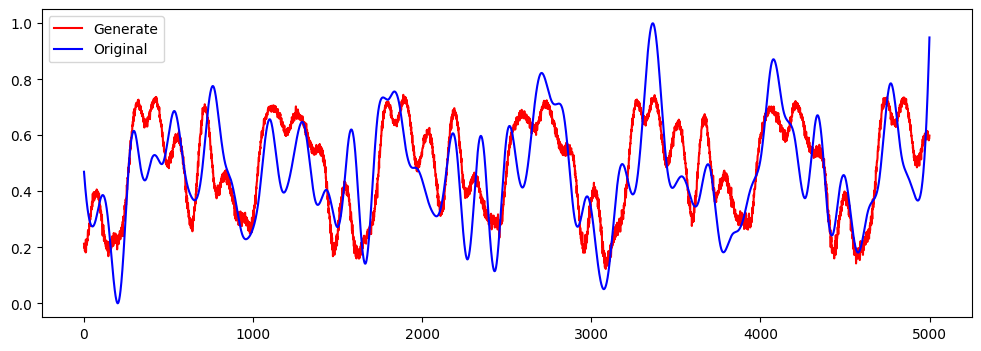

In [47]:
# 異常
plt.figure(figsize=(12, 4))
plt.plot(predict_value[0], color='r', label='Generate')
# plt.figure(figsize=(12, 4))
plt.plot(ppg_signal_noramalized[0], color='b', label='Original')
plt.legend()
plt.show()

## AF


In [ ]:
predict_value = loaded_autoencoder.predict(predict_input_signal[0])


se = (interpolated_ppg_signal[10] - predict_value[10]) ** 2
mse = np.mean(se)
rmse = np.sqrt(mse)

se1 = (interpolated_ppg_signal[40] - predict_value[40]) ** 2
mse1 = np.mean(se1)
rmse1 = np.sqrt(mse1)

se2 = (interpolated_ppg_signal[100] - predict_value[100]) ** 2
mse2 = np.mean(se2)
rmse2 = np.sqrt(mse2)

se3 = (interpolated_ppg_signal[150] - predict_value[150]) ** 2
mse3 = np.mean(se3)
rmse3 = np.sqrt(mse3)

se4 = (interpolated_ppg_signal[220] - predict_value[220]) ** 2
mse4 = np.mean(se4)
rmse4 = np.sqrt(mse4)


print('異常資料')
print('-------------------')
print('mse:', mse)
print('rmse:', rmse)
print('-------------------')
print('mse:', mse1)
print('rmse:', rmse1)
print('-------------------')
print('mse:', mse2)
print('rmse:', rmse2)
print('-------------------')
print('mse:', mse3)
print('rmse:', rmse3)
print('-------------------')
print('mse:', mse4)
print('rmse:', rmse4)

8/8 [==============================] - 1s 104ms/step
異常資料
-------------------
mse: 0.00895863804114505
rmse: 0.09465008209793085
-------------------
mse: 0.009055984988316439
rmse: 0.09516293915341434
-------------------
mse: 0.010793147255774531
rmse: 0.10389007294142463
-------------------
mse: 0.006288349477255953
rmse: 0.07929911397522643
-------------------
mse: 0.010923536640308783
rmse: 0.1045157243686747


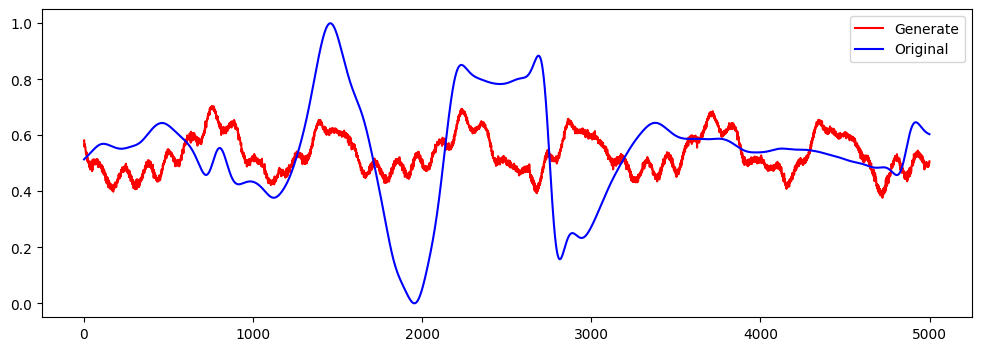

In [ ]:
# 異常
plt.figure(figsize=(12, 4))
plt.plot(predict_value[10], color='r', label='Generate')
# plt.figure(figsize=(12, 4))
plt.plot(ppg_signal_noramalized[10], color='b', label='Original')
plt.legend()
plt.show()